<a href="https://colab.research.google.com/github/Thanveerahmedshaik/MachineLearning/blob/main/Ridge_Regression_effect_on_coefficients_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **How are coefficient affected?**

In [2]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


In [3]:
data = load_diabetes()

In [4]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['Target'] = data.target

In [5]:
data.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [6]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [7]:
df.shape

(442, 11)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop('Target',axis=1),df.Target,test_size=0.2, random_state=2)

In [9]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [10]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
  reg = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())
  y_pred = reg.predict(X_test)
  r2_scores.append(r2_score(y_test,y_pred))

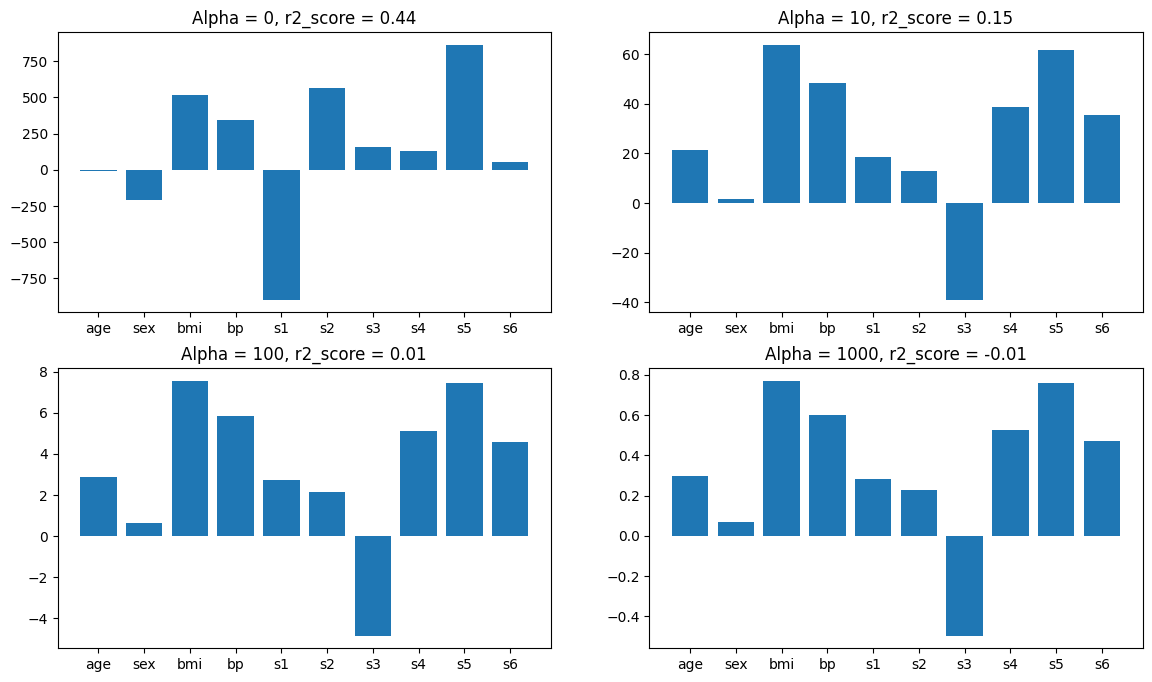

In [11]:
plt.figure(figsize=(14,8))

plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0, r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10, r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100, r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000, r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()

## **Higher coefficients are affected more**

In [12]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
  reg = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

In [13]:
input_array = np.array(coefs)
input_array

array([[-9.15865318e+00, -2.05454322e+02,  5.16693745e+02,
         3.40619999e+02, -8.95552002e+02,  5.61220679e+02,
         1.53893110e+02,  1.26731397e+02,  8.61127002e+02,
         5.24211224e+01],
       [-9.11611927e+00, -2.05329219e+02,  5.16889664e+02,
         3.40549436e+02, -8.83423872e+02,  5.51559582e+02,
         1.48587063e+02,  1.25353015e+02,  8.56485935e+02,
         5.24689164e+01],
       [-8.76148719e+00, -2.04313404e+02,  5.18380608e+02,
         3.39967926e+02, -7.87700510e+02,  4.75282181e+02,
         1.06795253e+02,  1.14629265e+02,  8.19745723e+02,
         5.28733494e+01],
       [-6.39950705e+00, -1.98662945e+02,  5.22056516e+02,
         3.36340595e+02, -3.83717571e+02,  1.52670882e+02,
        -6.60532428e+01,  7.56082088e+01,  6.59875219e+02,
         5.58292206e+01],
       [ 6.64373321e+00, -1.72237474e+02,  4.85529585e+02,
         3.14675846e+02, -7.29402092e+01, -8.05886882e+01,
        -1.74463527e+02,  8.36147099e+01,  4.84365316e+02,
         7.

In [14]:
coef_df = pd.DataFrame(input_array,columns = data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [15]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
  reg = Ridge(alpha = i)
  reg.fit(X_train,y_train)

  coefs.append(reg.coef_.tolist())

In [16]:
input_array = np.array(coefs).T

In [17]:
input_array.shape

(10, 10)

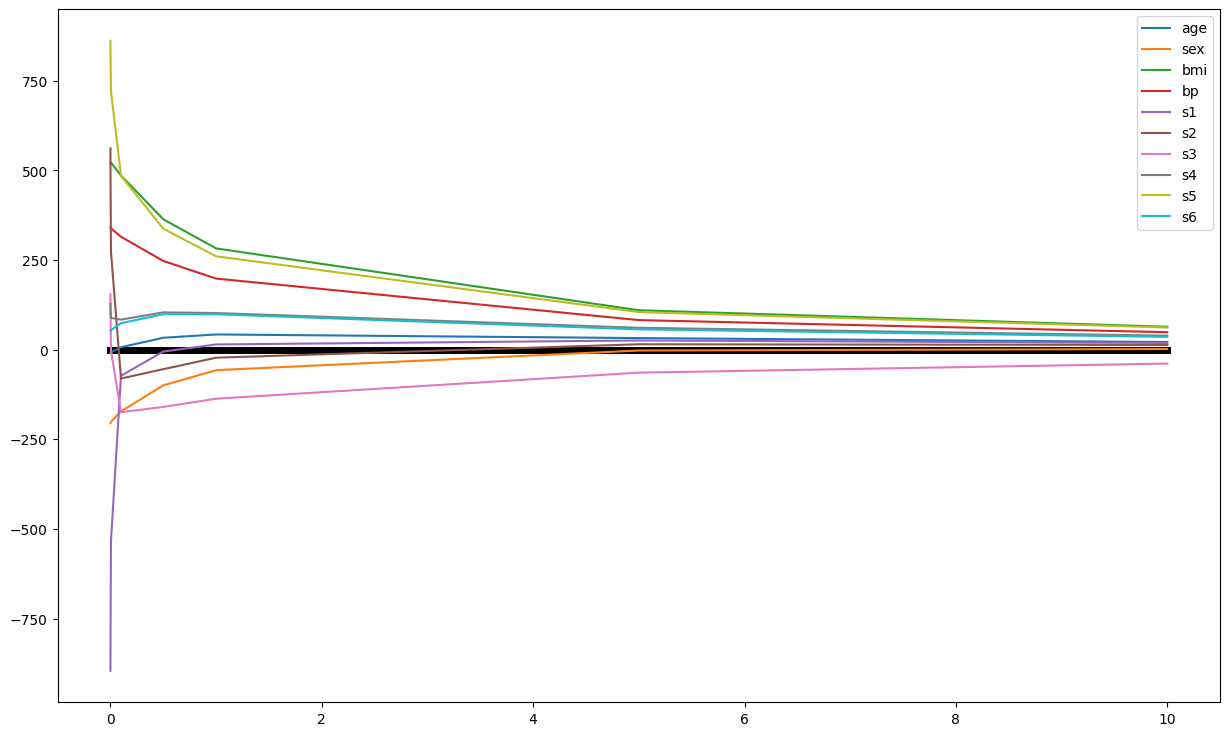

In [18]:
plt.figure(figsize=(15,9))

plt.plot(alphas,np.zeros(len(alphas)),color = 'black', linewidth = 5)
for i in range(input_array.shape[0]):
  plt.plot(alphas, input_array[i],label = data.feature_names[i])
plt.legend()
plt.show()

In [19]:
#All coefficients are converging close to zero but it is never going to be zero

## **Impact on Bias and Variance**

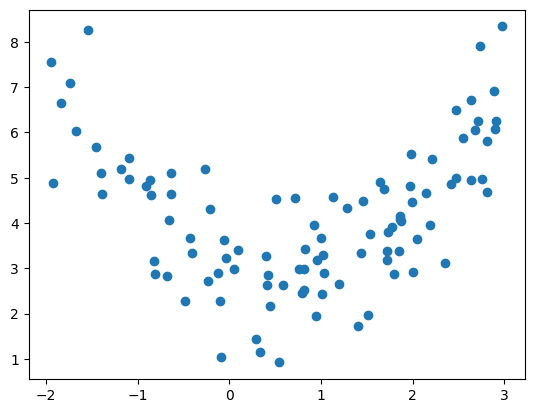

In [20]:
m = 100

X = 5*np.random.rand(m,1) - 2
y = 0.7* X**2 - 0.7*X + 3 + np.random.randn(m,1)

plt.scatter(X,y)
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 15)

X_train = poly.fit_transform(X_train)
X_test = poly.fit_transform(X_test)

$$ \text{Expected Loss} = \mathbb{E}\left[(y - \hat{y})^2\right] $$, $$ \text{Bias}^2 = \left(\mathbb{E}[\hat{y}] - y\right)^2 $$, $$ \text{Variance} = \mathbb{E}\left[(\hat{y} - \mathbb{E}[\hat{y}])^2\right] $$, $$ \text{Expected Loss} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Noise} $$, $$ J(\mathbf{w}) = \|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2 + \alpha \|\mathbf{w}\|_2^2 $$

In [23]:
from mlxtend.evaluate import bias_variance_decomp

#bias_variance_decomp calculates the bias and variance for any given particular lambda value that is alpha here
#

alphas = np.linspace(0,30,100)


loss = []
bias = []
variance = []


for i in alphas:
  reg = Ridge(alpha=i)
  avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(reg,X_train,y_train,X_test,y_test,
                                                              loss = 'mse',
                                                              random_seed = 12)
  loss.append(avg_expected_loss)
  bias.append(avg_bias)
  variance.append(avg_var)


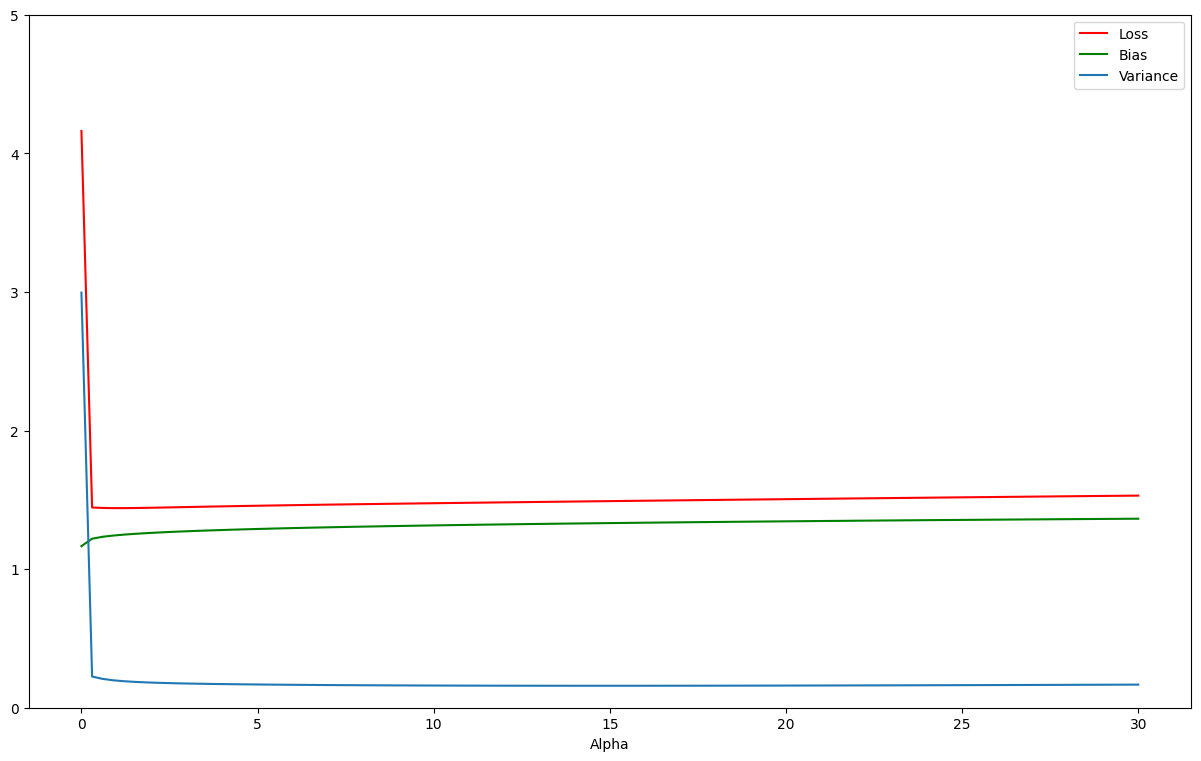

In [24]:
plt.figure(figsize = (15,9))

plt.plot(alphas,loss,label = 'Loss',color = 'r')
plt.plot(alphas,bias,label = 'Bias',color = 'g')
plt.plot(alphas,variance,label = 'Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()
plt.show()


## **Impact on Loss functoion**

[27.82809103] -2.29474455867698


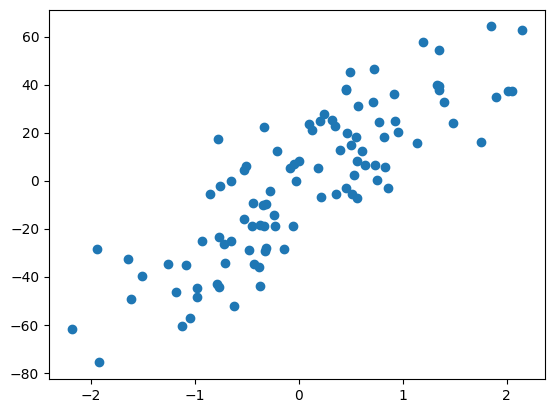

In [25]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples= 100,n_features=1,n_informative=1,n_targets=1,noise = 20,random_state=13)


plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

print(lr.coef_,lr.intercept_)

In [26]:
def cal_loss(m,alpha):
  return np.sum((y - m*X.ravel() +2.29)**2) + alpha*m*m

In [27]:
def predict(m):
  return m*X -2.29

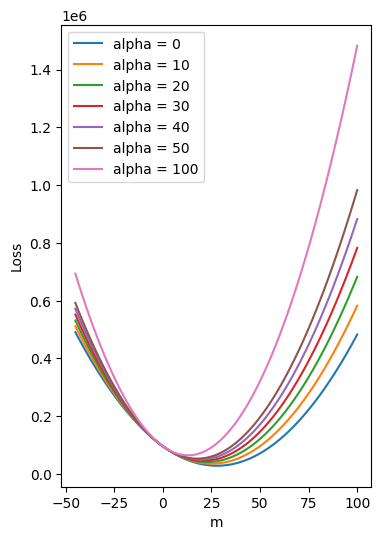

In [32]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))

for j in [0,10,20,30,40,50,100]:
  loss = []
  for i in range(m.shape[0]):
    loss_i = cal_loss(m[i],j)
    loss.append(loss_i)
  plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('m')
plt.ylabel('Loss')
plt.show()